In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from IPython.display import display
import seaborn as sns
from matplotlib import font_manager, rc, rcParams
from sklearn.model_selection import train_test_split
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
rcParams['axes.unicode_minus'] = False
%matplotlib notebook

In [3]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

X,y = make_blobs(random_state=0)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
logreg = LogisticRegression().fit(X_train,y_train)

print('test set score : {:.2f}'.format(logreg.score(X_test,y_test)))

test set score : 0.88


## 교차검증

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target,cv=5)
print('교차 검증 점수 :',scores)

교차 검증 점수 : [0.96666667 1.         0.93333333 0.96666667 1.        ]


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [10]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg,iris.data,iris.target,return_train_score=True)

res

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'fit_time': array([0.03693438, 0.02493834, 0.02094531, 0.02293801, 0.02094412]),
 'score_time': array([0.00099802, 0.00095892, 0.00099802, 0.        , 0.        ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [11]:
res_df = pd.DataFrame(res)
res_df

,fit_time,score_time,test_score,train_score
0,0.036934,0.000998,0.966667,0.966667
1,0.024938,0.000959,1.000000,0.966667
2,0.020945,0.000998,0.933333,0.983333
3,0.022938,0.000000,0.966667,0.983333
4,0.020944,0.000000,1.000000,0.975000


### Kfold

In [12]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
print('교차 검증 점수 :\n', cross_val_score(logreg,iris.data,iris.target,cv=kfold))

교차 검증 점수 :
 [1.         1.         0.86666667 0.93333333 0.83333333]


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

In [13]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)
print('교차 검증 점수 :\n', cross_val_score(logreg,iris.data,iris.target,cv=kfold))

교차 검증 점수 :
 [0. 0. 0.]


In [15]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3,shuffle=True,random_state=0)
print('교차 검증 점수 :\n', cross_val_score(logreg,iris.data,iris.target,cv=kfold))

교차 검증 점수 :
 [0.98 0.96 0.96]


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

### loocv

In [17]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
score = cross_val_score(logreg,iris.data,iris.target,cv=loo)
print('교차 검증 분할 횟수 :',len(score))
print('평균 정확도 : {:.2f}'.format(score.mean()))

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

교차 검증 분할 횟수 : 150
평균 정확도 : 0.97


### 임의 분할 교차검증

In [19]:
from sklearn.model_selection import ShuffleSplit
shuffe_split = ShuffleSplit(test_size=.5, train_size=.5,n_splits=10)
scores = cross_val_score(logreg,iris.data,iris.target,cv=shuffe_split)
print('교차 검증 점수 : \n',scores)

교차 검증 점수 : 
 [0.94666667 0.94666667 0.96       0.96       0.94666667 0.94666667
 0.97333333 0.94666667 0.94666667 0.97333333]


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

### 그룹별 교차 검증

In [21]:
from sklearn.model_selection import GroupKFold
X,y = make_blobs(n_samples=12,random_state=0)
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg,X,y,groups=groups,cv=GroupKFold(n_splits=3))
print('교차 검증 점수 : \n',scores)

교차 검증 점수 : 
 [0.75       0.6        0.66666667]


### 반복 교차 검증

In [25]:
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris.data,iris.target, cv=rskfold)

print('교차 검증 점수 :\n',scores)
print('교차 검증 평균 점수 : {:.3f}'.format(scores.mean()))

교차 검증 점수 :
 [1.         0.96666667 0.93333333 1.         0.93333333 0.96666667
 0.96666667 0.93333333 1.         0.96666667 0.93333333 1.
 1.         0.96666667 0.96666667 0.9        1.         1.
 0.93333333 0.96666667 0.93333333 0.96666667 0.96666667 1.
 0.96666667 1.         0.96666667 0.96666667 0.9        1.
 0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 0.96666667
 0.96666667 1.         1.         0.9        0.96666667 1.
 0.9        0.96666667 0.96666667 0.9        0.96666667 0.96666667
 1.         0.96666667]
교차 검증 평균 점수 : 0.965


In [99]:
import warnings
warnings.filterwarnings(action='default')

## 그리드 서치

### 간단한 그리드 서치

In [28]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)
print('훈련 세트의 크기 : {}\n테스트 세트의 크기 : {}'.format(X_train.shape[0],X_test.shape[0]))

훈련 세트의 크기 : 112
테스트 세트의 크기 : 38


In [29]:
best_score = 0

for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C).fit(X_train,y_train)
        score = svm.score(X_test,y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C':C,'gamma':gamma}
print('best_score :',best_score)
print('best_parameters :',best_parameters)

best_score : 0.9736842105263158
best_parameters : {'C': 100, 'gamma': 0.001}


### 매개변수 과대적합과 검증 세트

In [58]:
X = iris.data
y = iris.target
X_trainval,X_test,y_trainval,y_test = train_test_split(X,y,random_state=0)
X_train,X_val,y_train,y_val = train_test_split(X_trainval,y_trainval,random_state=1)
print(f'훈련 세트의 크기 : {X_train.shape[0]}\n검증 세트의 크기 : {X_val.shape[0]}\n테스트 세트의 크기 : {X_test.shape[0]}')

훈련 세트의 크기 : 84
검증 세트의 크기 : 28
테스트 세트의 크기 : 38


In [62]:
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C).fit(X_train,y_train)
        score = svm.score(X_val,y_val)
        if score > best_score:
            best_score = score
            best_parameters = {'C':C,'gamma':gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)
test_score = svm.score(X_test,y_test)

print('best_score :',best_score)
print('best_parameters :',best_parameters)
print('test_score : ',test_score)

best_score : 0.9731225296442687
best_parameters : {'C': 10, 'gamma': 0.1}
test_score :  0.9736842105263158


### 교차 검증을 사용한 그리드 서치

In [63]:
best_score = 0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C).fit(X_train,y_train)
        scores = cross_val_score(svm,X_trainval,y_trainval)
        score = scores.mean()
        if score > best_score:
            best_score = score
            best_parameters = {'C':C,'gamma':gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)
svm.score(X_test,y_test)
best_parameters

{'C': 10, 'gamma': 0.1}

In [67]:
param_grid = {'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]}

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(),param_grid=param_grid,return_train_score=True)

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =0)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [69]:
print('테스트 세트 점수 : {:.2f}'.format(grid_search.score(X_test,y_test)))

테스트 세트 점수 : 0.97


In [70]:
print('최적 매개변수 :',grid_search.best_params_)
print('최고 교차 검증 점수 : {:.2f}'.format(grid_search.best_score_))

최적 매개변수 : {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수 : 0.97


In [73]:
print('최고 성능 모델 :\n',grid_search.best_params_)

최고 성능 모델 :
 {'C': 10, 'gamma': 0.1}


In [77]:
pd.set_option('display.max_columns',None)
result = pd.DataFrame(grid_search.cv_results_)
result.head().T

,0,1,2,3,4
mean_fit_time,0.000990582,0.0012043,0.000807858,0.000795984,0.000996923
std_fit_time,0.000630596,0.000396099,0.00040443,0.000397995,4.25054e-06
mean_score_time,0.000598431,0.000399399,0.000588083,0.000393152,0
std_score_time,0.000488617,0.000489166,0.000480284,0.000481649,0
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


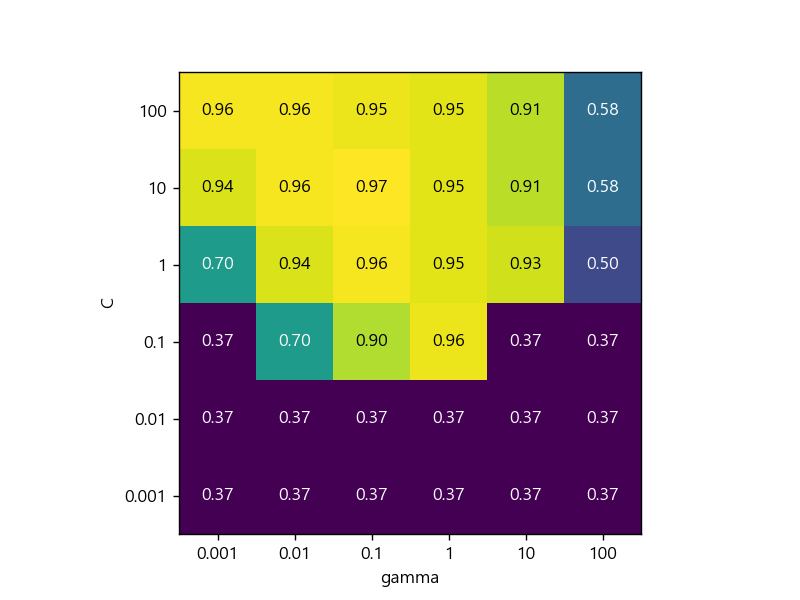

In [116]:
scores = np.array(result.mean_test_score).reshape(6,6)

mglearn.tools.heatmap(scores, xlabel='gamma',xticklabels=param_grid['gamma']
                     ,ylabel='C',yticklabels=param_grid['C'],cmap='viridis')

### 비대칭 매개변수의 그리드 탐색

In [80]:
param_grid = [{'kernel':['rbf'],'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]}
             ,{'kernel':['linear'],'C':[0.001,0.01,0.1,1,10,100]}]

grid_search = GridSearchCV(SVC(),param_grid=param_grid,return_train_score=True).fit(X_train,y_train)
print('최적 파라미터 :',grid_search.best_params_)
print('최고 교차 검증 점수 : {:.2f}'.format(grid_search.best_score_))

최적 파라미터 : {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수 : 0.97


In [83]:
results = pd.DataFrame(grid_search.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000790882,0.000399017,0.000798845,0.00119028,0.000996542,0.000796461,0.000799036,0.000800371,0.000598335,0.00099864,0.000997257,0.000797892,0.000398922,0.000995398,0.000399113,0.000589609,0.000399637,0.000997353,0.00059886,0.000796223,0.000398874,0.000399017,0.000997591,0.00119777,0.000607109,0.000600529,0.000598383,0.000398922,0.000408363,0.000799894,0.000198317,0.000798225,0.000400162,0.000590086,0.000997066,0.00119662,0.00059886,0.000599384,0.000598097,0.000399446,0.000607061,0.000410366
std_fit_time,0.000395645,0.000488694,0.000399425,0.000402904,8.97164e-07,0.000398238,0.000399522,0.000400203,0.000488539,2.69993e-06,4.8628e-07,0.000398946,0.000488578,4.6963e-06,0.000488811,0.000481712,0.000489454,1.78416e-07,0.000488968,0.000398165,0.000488519,0.000488694,1.78416e-07,0.000399145,0.000495995,0.000490342,0.000488578,0.000488578,0.000500359,0.000399959,0.000396633,0.000399114,0.000490098,0.000482231,2.74751e-06,0.000398517,0.000489039,0.000489399,0.000488344,0.000489222,0.000495922,0.000502728
mean_score_time,0.00039916,0.000997305,0.000597334,0.000199223,0,0.000399733,0.000389767,0.000398731,0.000399017,0,0,0.000398779,0.000591707,0,0.000597191,0.000199509,0.000788212,0.000607538,0.000399065,0.000200558,0.000399017,0.00059576,0.000398827,0.000398588,0.000198507,0.000399399,0.000390244,0.000408888,0.000597954,0.000597048,0.000398922,0,0.000399017,0.000597668,0,0.000607395,0.00019722,0.00039897,0.000199366,0.000199223,0.000200701,0.000599527
std_score_time,0.00048887,6.91003e-07,0.000487723,0.000398445,0,0.000489593,0.000477575,0.000488344,0.000488694,0,0,0.000488402,0.000483338,0,0.00048761,0.000399017,0.000394536,0.000496326,0.000488753,0.000401115,0.000488694,0.000486457,0.000488461,0.000488169,0.000397015,0.000489162,0.000478187,0.000501026,0.000488227,0.000487488,0.000488578,0,0.000488695,0.000487997,0,0.000496213,0.00039444,0.000488636,0.000398731,0.000398445,0.000401402,0.000489517
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 10, 'gamma': 100, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gam

### 중첩 교차 검증

In [85]:
param_grid = {'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]}
scores = cross_val_score(GridSearchCV(SVC(),param_grid=param_grid),X,y)

print('교차 검증 점수 :',scores)
print('교차 검증 평균 점수 :',scores.mean())

교차 검증 점수 : [0.96666667 1.         0.96666667 0.96666667 1.        ]
교차 검증 평균 점수 : 0.9800000000000001


## 평가 지표와 측정

In [86]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target == 9

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =0)

In [87]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print('에측된 레이블의 레이블 :',np.unique(pred_most_frequent))
print('테스트 점수 : {:.2f}'.format(dummy_majority.score(X_test,y_test)))

에측된 레이블의 레이블 : [False]
테스트 점수 : 0.90


In [94]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)
pred_tree = tree.predict(X_test)
print('테스트 점수 : {:.2f}'.format(tree.score(X_test,y_test)))

테스트 점수 : 0.93


In [95]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train,y_train)
pred_dummy = dummy.predict(X_test)
print('dummy 점수 : {:.2f}'.format(dummy.score(X_test,y_test)))

logreg = LogisticRegression().fit(X_train,y_train)
pred_logreg = logreg.predict(X_test)
print('Logreg 점수 : {:.2f}'.format(logreg.score(X_test,y_test)))

dummy 점수 : 0.82
Logreg 점수 : 0.97


### 오차행렬 이중분류

In [97]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test,pred_logreg)
print('오차 행렬 :\n',confusion)

오차 행렬 :
 [[398   5]
 [  7  40]]


In [100]:
from sklearn.metrics import f1_score
print('빈도 기반 더미 모델의 f1 score : {:.2f}'.format(f1_score(y_test,pred_most_frequent)))
print('무작위 더미 모델의 f1 score : {:.2f}'.format(f1_score(y_test,pred_dummy)))
print('트리 모델의 f1 score : {:.2f}'.format(f1_score(y_test,pred_tree)))
print('로지스틱 모델의 f1 score : {:.2f}'.format(f1_score(y_test,pred_logreg)))

빈도 기반 더미 모델의 f1 score : 0.00
무작위 더미 모델의 f1 score : 0.04
트리 모델의 f1 score : 0.64
로지스틱 모델의 f1 score : 0.87


C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [105]:
from sklearn.metrics import classification_report

tn = ['9아님','9']
def print_score(pred,target_name=tn):
    print(classification_report(y_test,pred,target_names=target_name))
print_score(pred_dummy)

              precision    recall  f1-score   support

         9아님       0.89      0.90      0.90       403
           9       0.05      0.04      0.04        47

    accuracy                           0.81       450
   macro avg       0.47      0.47      0.47       450
weighted avg       0.80      0.81      0.81       450



C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [106]:
print_score(pred_logreg)

              precision    recall  f1-score   support

         9아님       0.98      0.99      0.99       403
           9       0.89      0.85      0.87        47

    accuracy                           0.97       450
   macro avg       0.94      0.92      0.93       450
weighted avg       0.97      0.97      0.97       450



C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [108]:
X,y = make_blobs(n_samples=(400,50),cluster_std=[7.0,2],random_state=22)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
svc = SVC(gamma=.05).fit(X_train,y_train)

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


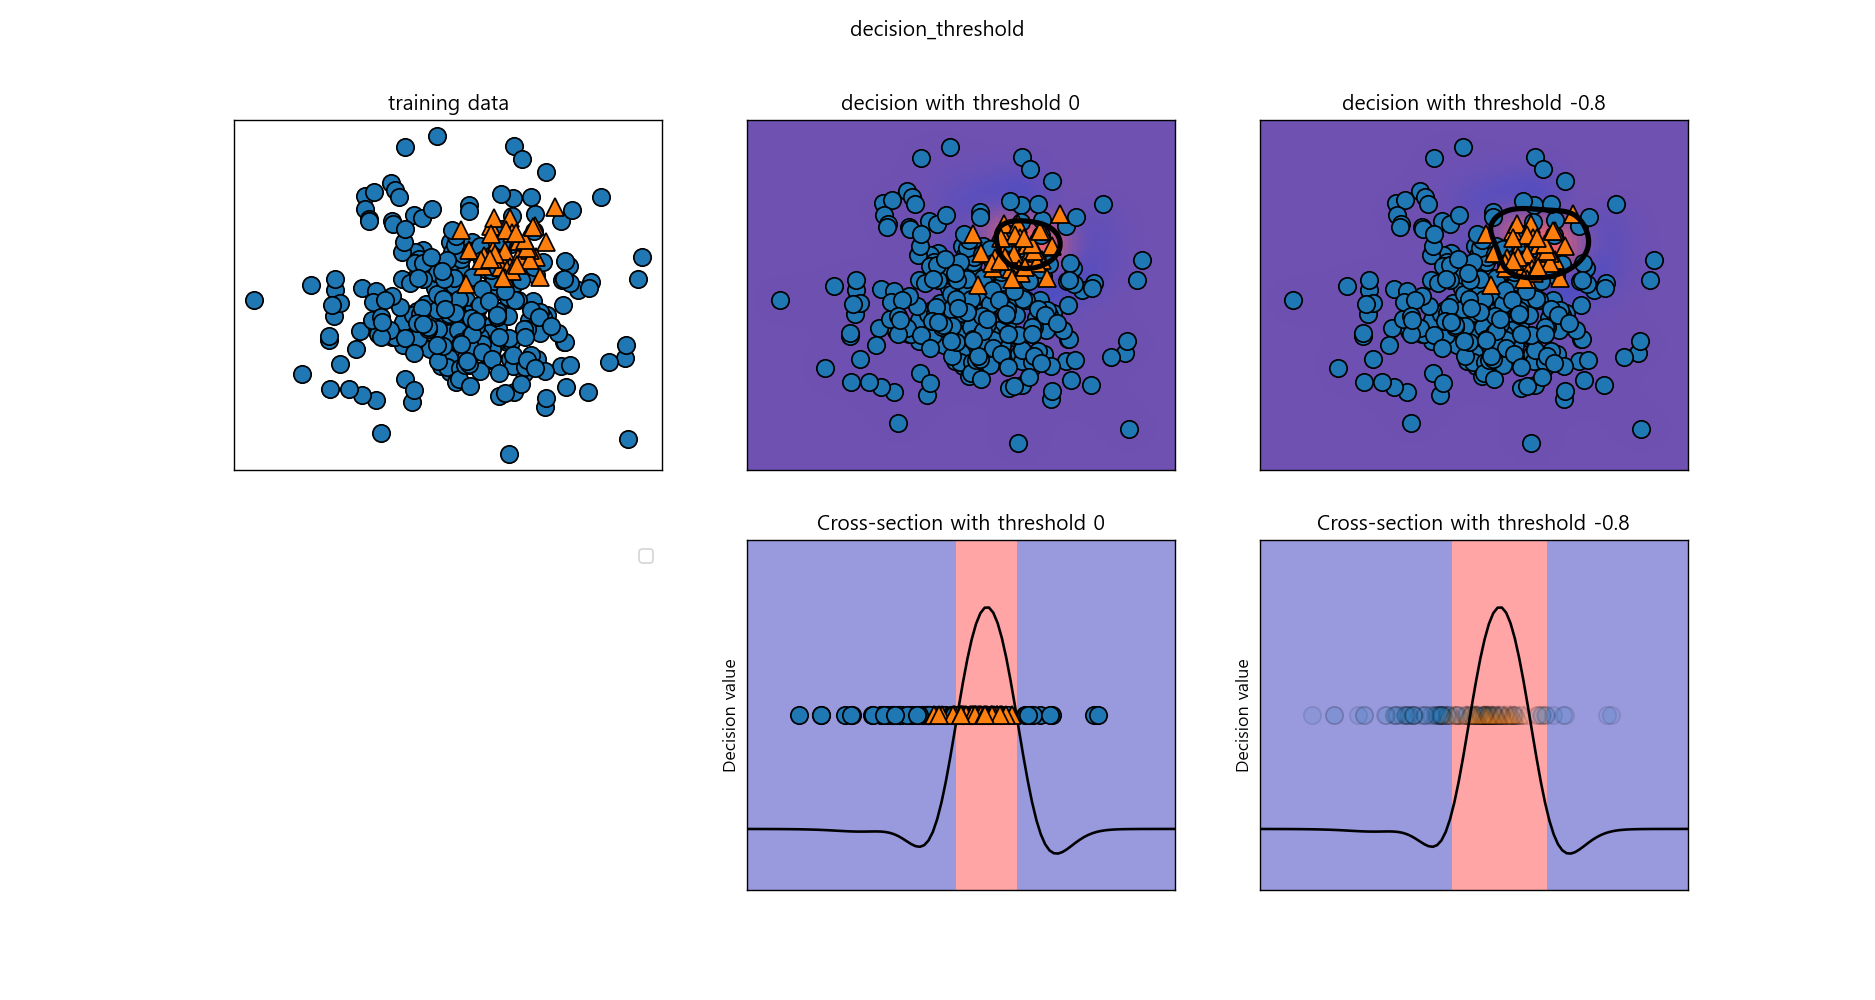

In [109]:
mglearn.plots.plot_decision_threshold()

In [110]:
print(classification_report(y_test,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [112]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8
print(classification_report(y_test,y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [113]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,svc.decision_function(X_test))

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


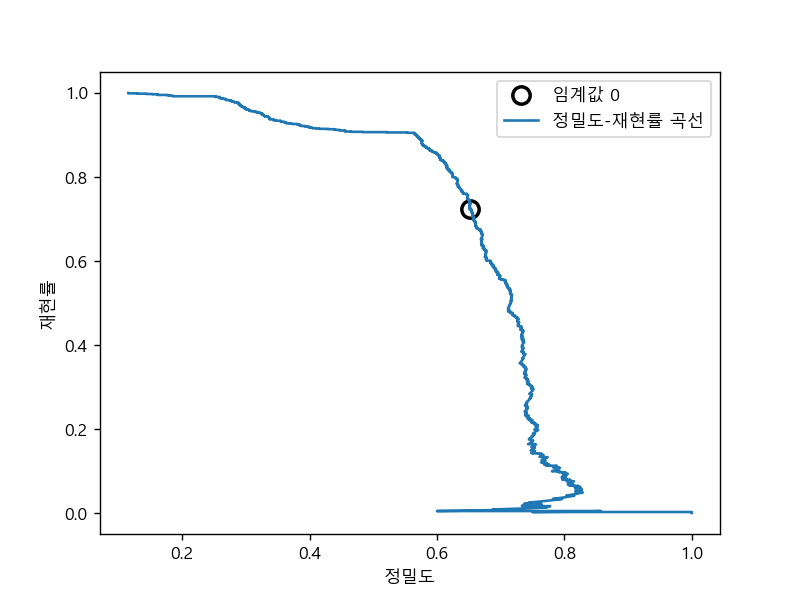

In [118]:
X,y = make_blobs(n_samples=(40000,500),cluster_std=[7.0,2],random_state=22)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
svc = SVC(gamma=.05).fit(X_train,y_train)

precision, recall, thresholds = precision_recall_curve(y_test,svc.decision_function(X_test))

close_zero = np.argmin(np.fabs(thresholds))
plt.figure()
plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,label='임계값 0',fillstyle='none',c='k',mew=2)
plt.plot(precision,recall,label='정밀도-재현률 곡선')
plt.xlabel('정밀도')
plt.ylabel('재현률')
plt.legend(loc='best')

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


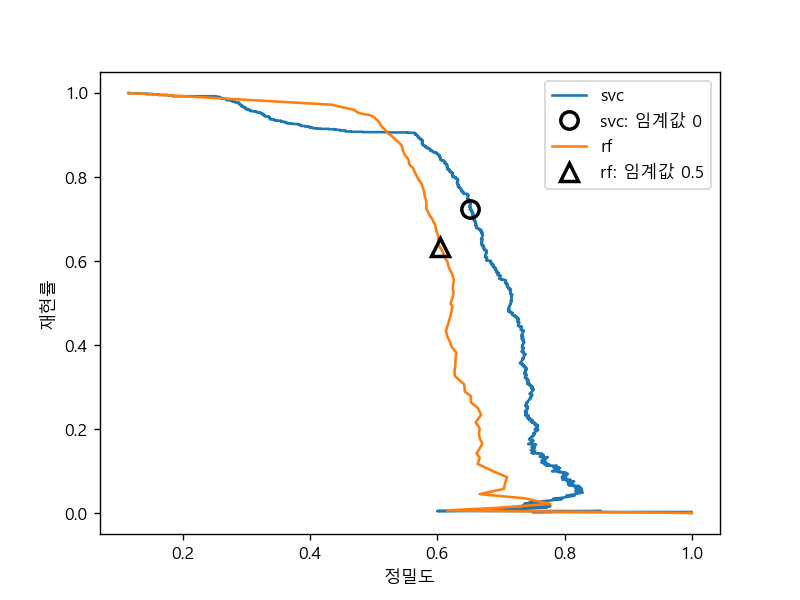

In [120]:
from sklearn.ensemble import RandomForestClassifier
X,y = make_blobs(n_samples=(40000,5000),cluster_std=[7.0,2],random_state=22)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
rf = RandomForestClassifier(n_estimators=100,random_state=0,max_features=2).fit(X_train,y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test,rf.predict_proba(X_test)[:,1])
plt.figure()

plt.plot(precision,recall,label='svc')
close_zero = np.argmin(np.fabs(thresholds))
plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,label='svc: 임계값 0',fillstyle='none',c='k',mew=2)

plt.plot(precision_rf,recall_rf,label='rf')
close_default_rf = np.argmin(np.fabs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf],recall_rf[close_default_rf]
         ,'^',markersize=10,label='rf: 임계값 0.5',fillstyle='none',c='k',mew=2)


plt.xlabel('정밀도')
plt.ylabel('재현률')
plt.legend(loc='best')

In [121]:
print('랜덤 포레스트의 f1_score : {:.3f}'.format(f1_score(y_test,rf.predict(X_test))))
print('svc f1_score : {:.3f}'.format(f1_score(y_test,svc.predict(X_test))))

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


랜덤 포레스트의 f1_score : 0.616
svc f1_score : 0.686


C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


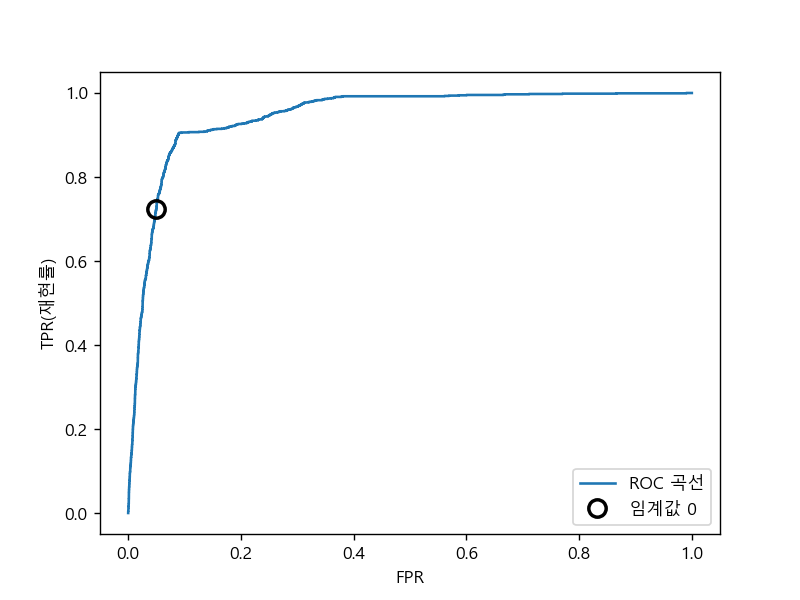

In [123]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,svc.decision_function(X_test))

plt.figure()
plt.plot(fpr,tpr,label='ROC 곡선')
plt.xlabel('FPR')
plt.ylabel('TPR(재현률)')

close_zero = np.argmin(np.fabs(thresholds))
plt.plot(fpr[close_zero],tpr[close_zero],'o',markersize=10,label='임계값 0',fillstyle='none',c='k',mew=2)
plt.legend(loc=4)

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


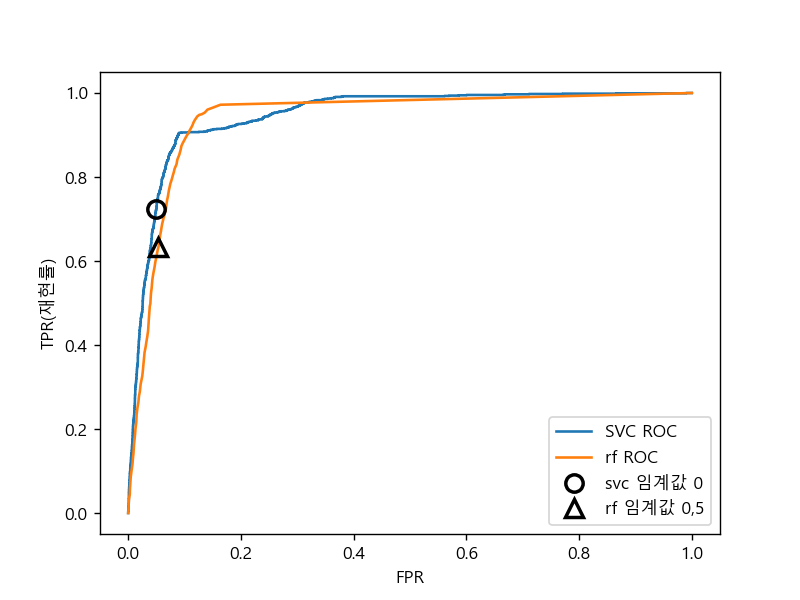

In [125]:
fpr_rf,tpr_rf,thresholds_rf = roc_curve(y_test,rf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='SVC ROC')
plt.plot(fpr_rf,tpr_rf,label='rf ROC')
plt.xlabel('FPR')
plt.ylabel('TPR(재현률)')

plt.plot(fpr[close_zero],tpr[close_zero],'o',markersize=10,label='svc 임계값 0',fillstyle='none',c='k',mew=2)

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf],tpr_rf[close_default_rf],'^',markersize=10,label='rf 임계값 0,5',fillstyle='none',c='k',mew=2)
plt.legend(loc=4)

In [127]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])
svc_auc = roc_auc_score(y_test,svc.decision_function(X_test))
print('rf AUC : {:.3}'.format(rf_auc))
print('svc AUC : {:.3}'.format(svc_auc))

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


rf AUC : 0.94
svc AUC : 0.947


C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


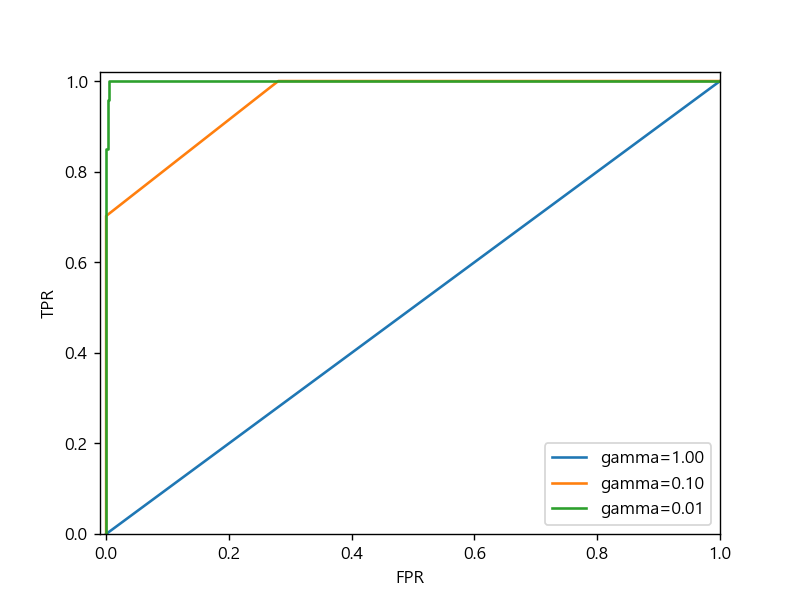

gamma = 1 정확도 = 0.90 AUC = 0.50
오차 행렬 
 [[403   0]
 [ 47   0]]
gamma = 0.1 정확도 = 0.90 AUC = 0.96
오차 행렬 
 [[403   0]
 [ 47   0]]
gamma = 0.01 정확도 = 0.90 AUC = 1.00
오차 행렬 
 [[403   0]
 [ 47   0]]


In [131]:
y = digits.target == 9
X = digits.data

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)
plt.figure()

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train,y_train)
    accuracy = svc.score(X_test,y_test)
    auc = roc_auc_score(y_test,svc.decision_function(X_test))
    fpr,tpr,_ = roc_curve(y_test,svc.decision_function(X_test))
    print('gamma = {} 정확도 = {:.2f} AUC = {:.2f}'.format(gamma,accuracy,auc))
    print('오차 행렬 \n',confusion_matrix(y_test,svc.predict(X_test)))
    plt.plot(fpr,tpr,label='gamma={:.2f}'.format(gamma))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim(-0.01,1)
plt.ylim(0,1.02)
plt.legend(loc=4)

### 다중 분류의 평가 지표

In [136]:
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(X,digits.target,random_state=0)

lr = LogisticRegression(solver='liblinear',multi_class='ovr').fit(X_train,y_train)
pred = lr.predict(X_test)
print('accuracy : {:.3f}'.format(accuracy_score(y_test,pred)))
print('오차 행렬:\n',confusion_matrix(y_test,pred))

accuracy : 0.953
오차 행렬:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


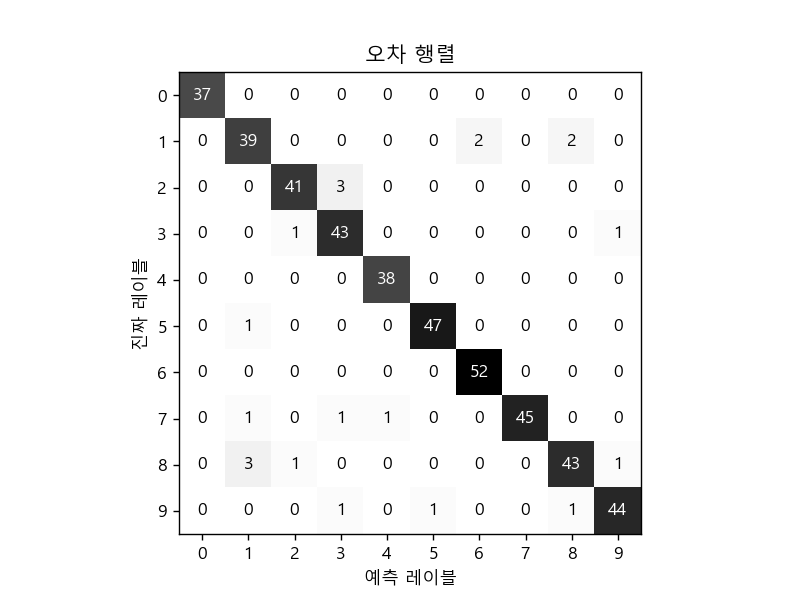

In [140]:
plt.figure()
score_image = mglearn.tools.heatmap(confusion_matrix(y_test,pred),xlabel='예측 레이블'
                                   ,ylabel='진짜 레이블',xticklabels=digits.target_names
                                   ,yticklabels=digits.target_names,cmap=plt.cm.gray_r,fmt='%d')
plt.title('오차 행렬')
plt.gca().invert_yaxis()

In [142]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [145]:
print('micro 평균 f1 점수 : {:.3f}'.format(f1_score(y_test,pred,average='micro'))) # 샘플을 동일한 비중으로 계산
print('macro 평균 f1 점수 : {:.3f}'.format(f1_score(y_test,pred,average='macro'))) # label을 동일한 비중으로 계산

micro 평균 f1 점수 : 0.953
macro 평균 f1 점수 : 0.954


### 회귀의 평가 지표

In [151]:
y = digits.target == 9 
print('기본 평가 지표 :',cross_val_score(SVC(),X,y))

explicit_accuracy = cross_val_score(SVC(),X,y,scoring='accuracy') # 정확성 지표
print('정확도 지표',explicit_accuracy)

roc_auc = cross_val_score(SVC(),X,y,scoring='roc_auc')
print('평균 정밀도 지표',roc_auc)

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


기본 평가 지표 : [0.975      0.99166667 1.         0.99442897 0.98050139]
정확도 지표 [0.975      0.99166667 1.         0.99442897 0.98050139]
평균 정밀도 지표 [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [156]:
res = cross_validate(SVC(),X,y,scoring=['accuracy','roc_auc','recall_macro'],return_train_score=True)
display(pd.DataFrame(res).T)

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4
fit_time,0.029921,0.027938,0.029867,0.030949,0.027923
score_time,0.017952,0.012916,0.016996,0.013930,0.013965
test_accuracy,0.975000,0.991667,1.000000,0.994429,0.980501
train_accuracy,0.994433,0.995825,0.995132,0.995828,0.996523
test_roc_auc,0.997171,0.998543,1.000000,0.999828,0.984004
train_roc_auc,0.998679,0.999141,0.998975,0.998825,0.999914
test_recall_macro,0.887346,0.958333,1.000000,0.972222,0.902778
train_recall_macro,0.972222,0.982252,0.978780,0.982252,0.985725


In [162]:
from sklearn.metrics import average_precision_score
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

param_grid = {'gamma':[0.0001,0.001,0.01,0.1,1,10]}

grid = GridSearchCV(SVC(),param_grid=param_grid,cv=3).fit(X_train,y_train)
print('정확도 지표를 사용한 그리드 서치')
print('최적의 파라미터',grid.best_params_)
print('최상의 교차검증 정확도 : {:.3f}'.format(grid.best_score_))
print('테스트 세트 평균 정밀도 :{:.3f}'.format(average_precision_score(y_test,grid.decision_function(X_test))))
print('테스트 세트 정확도 : {:.3f}'.format(grid.score(X_test,y_test)))

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


정확도 지표를 사용한 그리드 서치
최적의 파라미터 {'gamma': 0.001}
최상의 교차검증 정확도 : 0.996
테스트 세트 평균 정밀도 :0.997
테스트 세트 정확도 : 0.991


In [168]:
grid = GridSearchCV(SVC(),param_grid=param_grid,scoring='average_precision')
grid.fit(X_train,y_train)
print('평균 정밀도를 사용한 그리드 서치')
print('최적의 파라미터',grid.best_params_)
print('최상의 교차검증 정확도 : {:.3f}'.format(grid.best_score_))
print('테스트 세트 평균 정밀도 :{:.3f}'.format(average_precision_score(y_test,grid.decision_function(X_test))))
print('테스트 세트 정확도 : {:.3f}'.format(grid.score(X_test,y_test)))

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


평균 정밀도를 사용한 그리드 서치
최적의 파라미터 {'gamma': 0.001}
최상의 교차검증 정확도 : 0.992
테스트 세트 평균 정밀도 :0.997
테스트 세트 정확도 : 0.997


In [166]:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="average_precision")
grid.fit(X_train, y_train)
print("평균 정밀도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수 (평균 정밀도): {:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(
      # grid.score 점수와 동일합니다
      average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(
      accuracy_score(y_test, grid.predict(X_test))))

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


평균 정밀도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.001}
최상의 교차 검증 점수 (평균 정밀도): 0.992
테스트 세트 평균 정밀도: 0.997
테스트 세트 정확도: 0.991
